# Imports and defs for lecture

In [1]:
# These are the standard imports for CS 111. 
# This list may change as the quarter goes on.

import os
import math
import time
import struct
import json
import pandas as pd
import networkx as nx
import numpy as np
import numpy.linalg as npla
import scipy
import scipy.sparse.linalg as spla
from scipy import sparse
from scipy import linalg
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline


# Lecture starts here

### Reminder: 1st order ODE using the solve_ivp() solver

Text(0.5, 1.0, 'ydot = t/2')

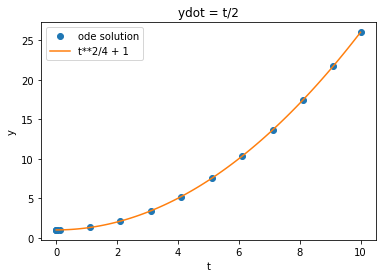

In [2]:
def f(t, y):
    """function to be integrated to solve an ODE or a system of ODEs
    Input:
      t is a scalar time
      y is a vector of variables
    Output:
      ydot is the vector dy/dt
    """
    ydot = t/2
    return ydot

tspan = (0,10)
yinit = [1]

sol = integrate.solve_ivp(fun = f, t_span = tspan, 
                          y0 = yinit, method = 'RK23', max_step = 1)

%matplotlib inline
plt.plot(sol.t, sol.y[0], 'o', label='ode solution')
tt = np.linspace(0, 10, 100)
plt.plot(tt, tt**2/4 + 1, label='t**2/4 + 1')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('ydot = t/2')

### Let's define a function to do Euler's Method (ode1)

In [3]:
# Introducing the np.concatenate() function
a = np.array([1,2,3])
b = np.array([11,22,33])

print(np.concatenate((a,b)))
print()

a = np.array([[1,2,3],[4,5,6]])
b = np.array([[11,22,33],[44,55,66]])

print(np.concatenate((a,b), axis = 1))

[ 1  2  3 11 22 33]

[[ 1  2  3 11 22 33]
 [ 4  5  6 44 55 66]]


In [4]:
def ode1(fun, t_span, y0, h):
    """Forward Euler algorithm: demo verison
    
    ode1(fun, t_span, y0, h) uses fixed step size h
    """
    
    # First make the inputs into numpy arrays (instead of single value)
    t0     = np.array(t_span[0]).reshape(1)
    tfinal = np.array(t_span[1]).reshape(1)
    y0     = np.array(y0).reshape(len(y0), 1)
    
    # Initialize the list of solution points
    sol_t = t0
    sol_y = y0

    step = 0
    t = t0
    y = y0
    while t < tfinal:
        y = y + h * np.array(fun(t, y))
        t = t + h
        # collect the data points in vectors sol_t and sol_y
        sol_t = np.concatenate((sol_t, t))
        sol_y = np.concatenate((sol_y, y), axis = 1)
        step += 1
    print('ode1 took', step, 'steps')
    return sol_t, sol_y


ode1 took 10001 steps


Text(0.5, 1.0, 'ydot = y/2')

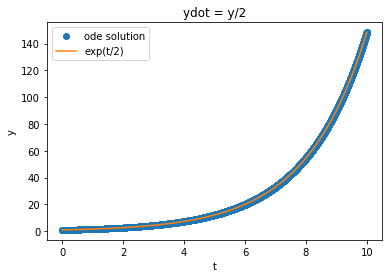

In [5]:
# demo of ode1 with exp(t/2)
def f(t, y):
    """function to be integrated to solve an ODE or a system of ODEs
    Input:
      t is a scalar time
      y is a vector of variables
    Output:
      ydot is the vector dy/dt
    """
    ydot = y/2
    return ydot

tspan = (0,10)
yinit = [1]
step_size = .001 # try 1, .1, .01, .001

sol_t, sol_y = ode1(fun = f, t_span = tspan, y0 = yinit, h = step_size)

%matplotlib inline
plt.plot(sol_t, sol_y[0], 'o', label='ode solution')
tt = np.linspace(0, 10, 100)
plt.plot(tt, np.exp(tt/2), label='exp(t/2)')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('ydot = y/2')

### 2nd order ODE with a Non-Linear Sol'n (oscillator example) using solve_ivp()

Text(0.5, 1.0, 'Harmonic oscillator with y(0) = 1.00, ydot(0) = -0.25')

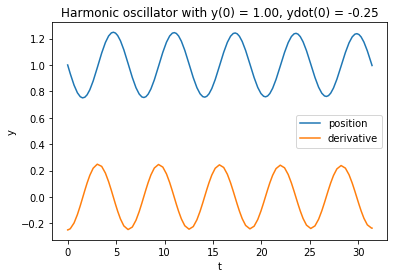

In [14]:
def weightf(t, y):
    """function to be integrated to solve a second-order ODE for a harmonic oscillator
    Input:
      t is a scalar time
      y is a vector of variables,
        in this case y = [position, 1st derivative]
    Output:
      ydot is the vector dy/dt,
        in this case ydot = [1st derivative, 2nd derivative]
    
    The second-order ODE being integrated is d^2 y / dt^2 = 1 - y.
    """
    ydot = [y[1] , 1-y[0]]
    return ydot

tspan = (0, 10*np.pi)
#yinit = [1/2, 0]
# also try
#yinit = [1.5, 0]
#yinit = [1, 0]
yinit = [1, -1/4]

sol = integrate.solve_ivp(fun = weightf, t_span = tspan, y0 = yinit, method = 'RK23')

%matplotlib inline
plt.plot(sol.t, sol.y[0], label='position')
plt.plot(sol.t, sol.y[1], label='derivative')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Harmonic oscillator with y(0) = %.2f, ydot(0) = %.2f' % (yinit[0], yinit[1]))

ode1 took 31416 steps


Text(0.5, 1.0, 'Harmonic oscillator with y(0) = 0.50, ydot(0) = 0.00')

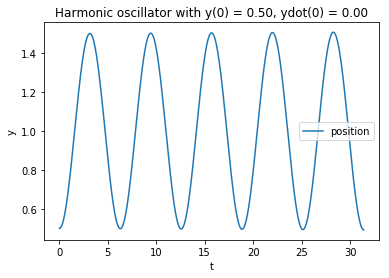

In [17]:
# demo of ode1 with harmonic oscillator
def weightf(t, y):
    """function to be integrated to solve a second-order ODE for a harmonic oscillator
    Input:
      t is a scalar time
      y is a vector of variables,
        in this case y = [position, 1st derivative]
    Output:
      ydot is the vector dy/dt,
        in this case ydot = [1st derivative, 2nd derivative]
    
    The second-order ODE being integrated is d^2 y / dt^2 = 1 - y.
    """
    ydot = [y[1] , 1-y[0]]
    return ydot

tspan = (0, 10*np.pi)
yinit = [1/2, 0]
step_size = .001   # try .1, .01, .001

sol_t, sol_y = ode1(fun = weightf, t_span = tspan, y0 = yinit, h = step_size)

%matplotlib inline
plt.plot(sol_t, sol_y[0], label='position')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Harmonic oscillator with y(0) = %.2f, ydot(0) = %.2f' % (yinit[0], yinit[1]))

#if run with .1 high step size, you will get a bad approx and it will be increasing in energy, which is completelyu wrong.
#fi this by taking smaller step sizes that can more accurately reflect the oscillation in the actual wave. 

ode1 took 31416 steps


Text(0.5, 1.0, 'Harmonic oscillator with y(0) = 0.50, ydot(0) = 0.00')

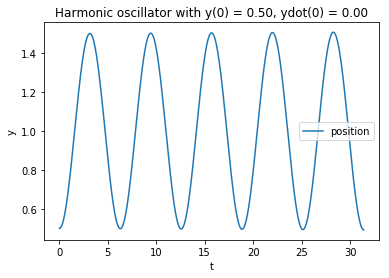

In [8]:
# demo of ode1 with harmonic oscillator
def weightf(t, y):
    """function to be integrated to solve a second-order ODE for a harmonic oscillator
    Input:
      t is a scalar time
      y is a vector of variables,
        in this case y = [position, 1st derivative]
    Output:
      ydot is the vector dy/dt,
        in this case ydot = [1st derivative, 2nd derivative]
    
    The second-order ODE being integrated is d^2 y / dt^2 = 1 - y.
    """
    ydot = [y[1] , 1-y[0]]
    return ydot

tspan = (0, 10*np.pi)
yinit = [1/2, 0]
step_size = .001   # try .1, .01, .001

sol_t, sol_y = ode1(fun = weightf, t_span = tspan, y0 = yinit, h = step_size)

%matplotlib inline
plt.plot(sol_t, sol_y[0], label='position')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Harmonic oscillator with y(0) = %.2f, ydot(0) = %.2f' % (yinit[0], yinit[1]))

### Let's modify our ode1 to utilize 2 slopes (ode2)

In [9]:
def ode2(fun, t_span, y0, h):
    """Modified Euler algorithm that uses two slopes
    
    ode2(fun, t_span, y0, h) uses fixed step size h
    """
    
    # First make the inputs into numpy arrays
    t0     = np.array(t_span[0]).reshape(1)
    tfinal = np.array(t_span[1]).reshape(1)
    y0     = np.array(y0).reshape(len(y0), 1)
    
    # Initialize the list of solution points
    sol_t = t0
    sol_y = y0

    step = 0
    t = t0
    y = y0
    while t < tfinal:
        s1 = np.array(fun(t, y))
        s2 = np.array(fun( t + (h/2), y + (h/2)*s1))
        y = y + h * s2
        t = t + h
        
        sol_t = np.concatenate((sol_t, t))
        sol_y = np.concatenate((sol_y, y), axis = 1)
        step += 1
    print('ode2 took', step, 'steps')
    return sol_t, sol_y


ode2 took 101 steps


Text(0.5, 1.0, 'ydot = y/2')

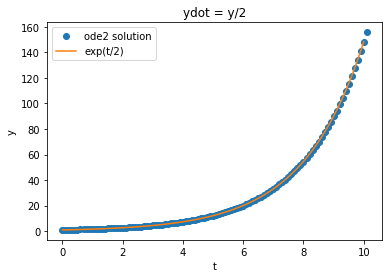

In [10]:
# demo of ode2 with exp(t/2)
def f(t, y):
    """function to be integrated to solve an ODE or a system of ODEs
    Input:
      t is a scalar time
      y is a vector of variables
    Output:
      ydot is the vector dy/dt
    """
    ydot = y/2
    return ydot

tspan = (0,10)
yinit = [1]
step_size = .1 # try 1, .1, .01, .001

sol_t, sol_y = ode2(fun = f, t_span = tspan, y0 = yinit, h = step_size)

%matplotlib inline
plt.plot(sol_t, sol_y[0], 'o', label='ode2 solution')
tt = np.linspace(0, 10, 100)
plt.plot(tt, np.exp(tt/2), label='exp(t/2)')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('ydot = y/2')

ode2 took 101 steps


Text(0.5, 1.0, 'ydot = y/2')

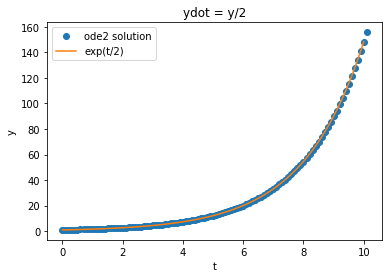

In [11]:
# demo of ode2 with exp(t/2)
def f(t, y):
    """function to be integrated to solve an ODE or a system of ODEs
    Input:
      t is a scalar time
      y is a vector of variables
    Output:
      ydot is the vector dy/dt
    """
    ydot = y/2
    return ydot

tspan = (0,10)
yinit = [1]
step_size = .1 # try 1, .1, .01, .001

sol_t, sol_y = ode2(fun = f, t_span = tspan, y0 = yinit, h = step_size)

%matplotlib inline
plt.plot(sol_t, sol_y[0], 'o', label='ode2 solution')
tt = np.linspace(0, 10, 100)
plt.plot(tt, np.exp(tt/2), label='exp(t/2)')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('ydot = y/2')

ode2 took 315 steps


Text(0.5, 1.0, 'Harmonic oscillator with y(0) = 0.50, ydot(0) = 0.00')

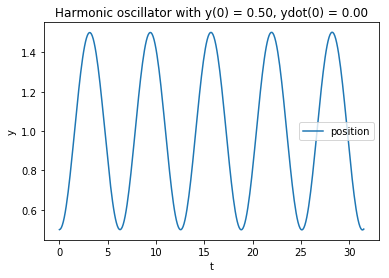

In [12]:
# demo of ode2 with harmonic oscillator
def weightf(t, y):
    """function to be integrated to solve a second-order ODE for a harmonic oscillator
    Input:
      t is a scalar time
      y is a vector of variables,
        in this case y = [position, 1st derivative]
    Output:
      ydot is the vector dy/dt,
        in this case ydot = [1st derivative, 2nd derivative]
    
    The second-order ODE being integrated is d^2 y / dt^2 = 1 - y.
    """
    ydot = [y[1] , 1-y[0]]
    return ydot

tspan = (0, 10*np.pi)
yinit = [1/2, 0]
step_size = .1   # try .1, .01, .001

sol_t, sol_y = ode2(fun = weightf, t_span = tspan, y0 = yinit, h = step_size)

%matplotlib inline
plt.plot(sol_t, sol_y[0], label='position')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Harmonic oscillator with y(0) = %.2f, ydot(0) = %.2f' % (yinit[0], yinit[1]))